In [35]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("churn_prediction.csv")

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [7]:
data['churn'].value_counts()

0    17793
1     4274
Name: churn, dtype: int64

In [8]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [9]:
X = data.drop(columns=['churn','customer_id'])
Y = data['churn']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test , y_train, y_test = tts(scaled_X,Y,train_size=0.80,random_state = 101)
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [14]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [15]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

In [16]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
predicted_probabilities

array([[0.6893318 , 0.3106682 ],
       [0.53281919, 0.46718081],
       [0.58596091, 0.41403909],
       ...,
       [0.6325271 , 0.3674729 ],
       [0.57483652, 0.42516348],
       [0.6365146 , 0.3634854 ]])

In [18]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2572,  975],
       [ 307,  560]], dtype=int64)

In [19]:
classifier.score(x_test, y_test) #Accuracy

0.7095604893520616

In [20]:
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.36482084690553745

In [21]:
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6459054209919262

In [22]:
f1 = 2/((1/Precision)+(1/Recall))
f1

0.46627810158201494

In [23]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.466278101582015

In [24]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

In [25]:
precision

array([0.89336575, 0.36482085])

In [26]:
recall

array([0.72511982, 0.64590542])

In [27]:
f1

array([0.80049798, 0.4662781 ])

In [30]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3547
           1       0.36      0.65      0.47       867

    accuracy                           0.71      4414
   macro avg       0.63      0.69      0.63      4414
weighted avg       0.79      0.71      0.73      4414



## Precision-Recall Curve

In [34]:
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4407,), (4407,), (4406,))

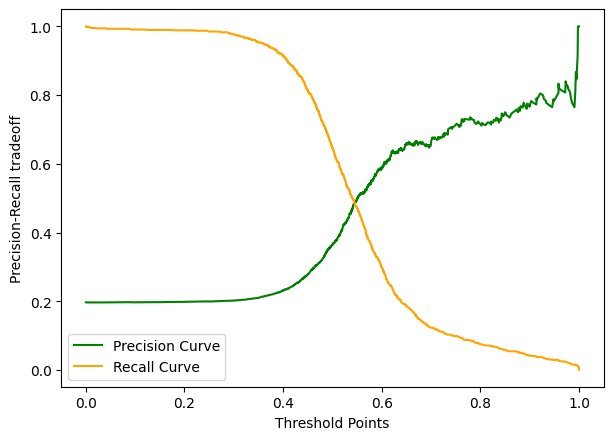

In [38]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(threshold_points, precision_points[:-1],color='green',label='Precision Curve')
plt.plot(threshold_points, recall_points[:-1],color='orange',label='Recall Curve')
plt.xlabel('Threshold Points')
plt.ylabel('Precision-Recall tradeoff')
plt.legend()
plt.show()

## AUC-ROC Curve

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

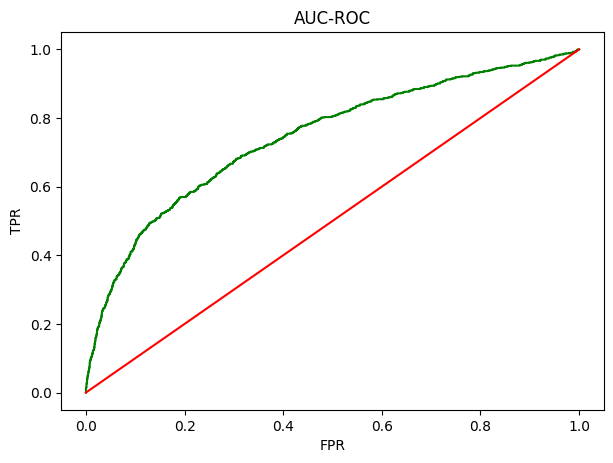

0.7443943563594362

In [43]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(fpr,tpr, color='green')
plt.plot([0,1],[0,1], label='baseline', color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC')
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

## Coefficient Plot

In [44]:
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame({'coefficients':c,'variable':x})

coeff_plot = coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.069137,current_balance
14,-0.251089,previous_month_credit
10,-0.239561,previous_month_end_balance
0,-0.166528,vintage
8,-0.128882,days_since_last_transaction


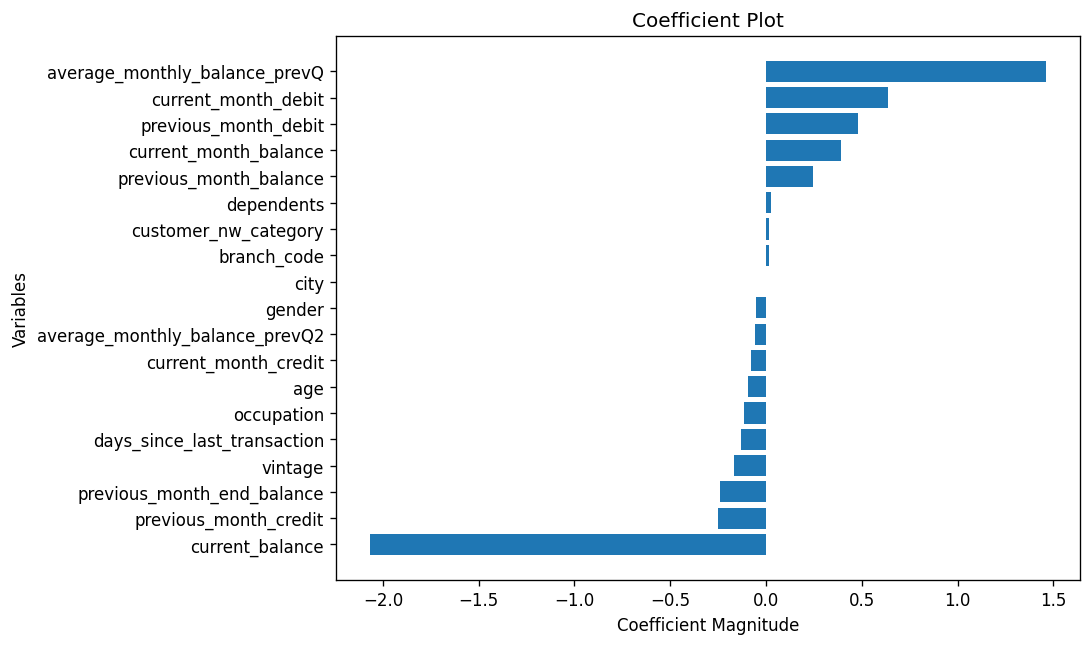

In [46]:
plt.figure(figsize=(8,6), dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Variables')
plt.title('Coefficient Plot')
plt.show()